### Get Required Libraries

In [54]:
from PDKitRotationFeatures import gait_module
import pandas as pd
import numpy as np
import synapseclient as sc
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Instantiate Object

In [87]:
syn = sc.login()

Welcome, Aryton Tediarjo!



INFO:synapseclient_default:Welcome, Aryton Tediarjo!



### Demo

In [61]:
## get sample data
data = syn.tableQuery("SELECT * FROM syn12514611 where healthCode = '1fa674e9-2c49-4260-83f0-681ace2a5125'")
file_dict = syn.downloadTableColumns(data, columns = ["walk_motion.json"])

INFO:synapseclient_default:Downloading 0 files, 213 cached locally


### Shape Sample Data from Synapse

In [77]:
fhandle = list(file_dict.keys())[2]

ts = pd.read_json(file_dict[fhandle])
ts_accel_sample = ts[ts["sensorType"] == "userAcceleration"].rename(
    {"timestamp":"t"}, axis = 1)[["t", "x", "y", "z"]].reset_index(drop = True)
ts_gyro_sample = ts[ts["sensorType"] == "rotationRate"].rename(
    {"timestamp":"t"}, axis = 1)[["t", "x", "y", "z"]].reset_index(drop = True)

### Visualize Sample

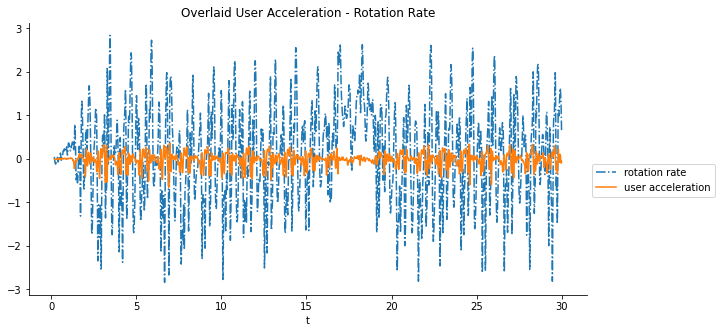

In [78]:
ts_gyro_sample.set_index("t")["y"].plot(figsize = (10,5), 
                                        linestyle = "-.", 
                                        label = "rotation rate")
ts_accel_sample.set_index("t")["y"].plot(figsize = (10,5),
                                        label = "user acceleration")
plt.legend(bbox_to_anchor=(1, 0.5))
plt.title("Overlaid User Acceleration - Rotation Rate")
sns.despine()
plt.show()

### Feature Pipeline

In [88]:
featureObjs = gait_module.GaitFeatures(detect_rotation=True)

In [109]:
result = gait_module.GaitFeatures(detect_rotation=True, sensor_window_size = 512).run_pipeline(ts_accel_sample, ts_gyro_sample)

[WARNING] /Users/atediarjo/Documents/SageBionetworks/environments/test_venv/lib/python3.7/site-packages/pywt/_multilevel.py:45: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))

  "boundary effects.").format(level))



In [111]:
result[["window_start", "window_end", "rotation_omega"]]

,window_start,window_end,rotation_omega
0,0.000000,5.110621,NaN
1,1.026146,6.136771,NaN
2,2.042232,7.152861,NaN
3,3.068382,8.179012,NaN
4,4.084471,9.195103,NaN
5,5.100561,10.211194,NaN
6,6.126711,11.237345,NaN
7,7.142801,12.253438,NaN
8,8.168952,13.279590,NaN
9,9.185043,14.295685,NaN
